# Monte Carlo Tree Search

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import display
from collections import defaultdict

In [2]:
metadata = pd.read_csv('metadata.csv', header=[0,1], index_col=0).T
metadata.distance = metadata.distance.astype(int)
metadata.n = metadata.n.astype(int)
metadata.total = metadata.total.astype(float)
a = metadata.index.get_level_values(0).astype(float)
b = metadata.index.get_level_values(1).astype(int)
metadata.index = [a, b]

runs = pd.read_csv('runs.csv', header=[0,1], index_col=0).T
runs.index = [a, b]

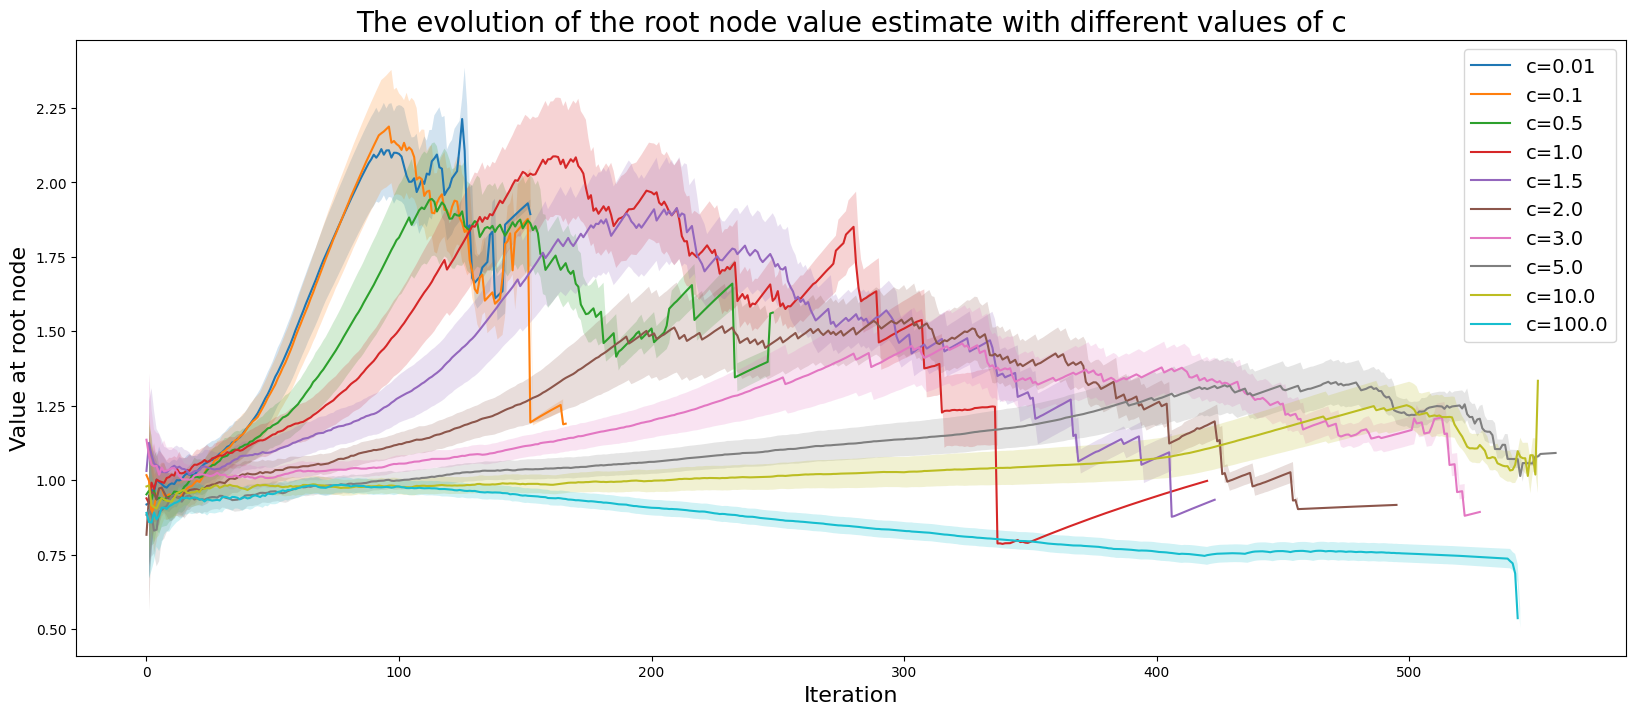

In [3]:
plt.figure(figsize=(20, 8))
for c, df in runs.groupby('c', sort=False):
    range_ = (np.arange(metadata.groupby('c').n.max().loc[c]) + 1)
    normalized = df.dropna(axis=1, how='all') / range_
    plt.plot(normalized.mean(), label=f"c={c}")
    plt.fill_between(range_, normalized.mean() + normalized.std()/5, normalized.mean() - normalized.std()/5, alpha=0.2)
plt.legend(fontsize=14)
plt.xlabel("Iteration", fontsize=16)
plt.ylabel("Value at root node", fontsize=16)
plt.title("The evolution of the root node value estimate with different values of c", fontsize=20)
plt.savefig("figures/evolution.png")
plt.show()

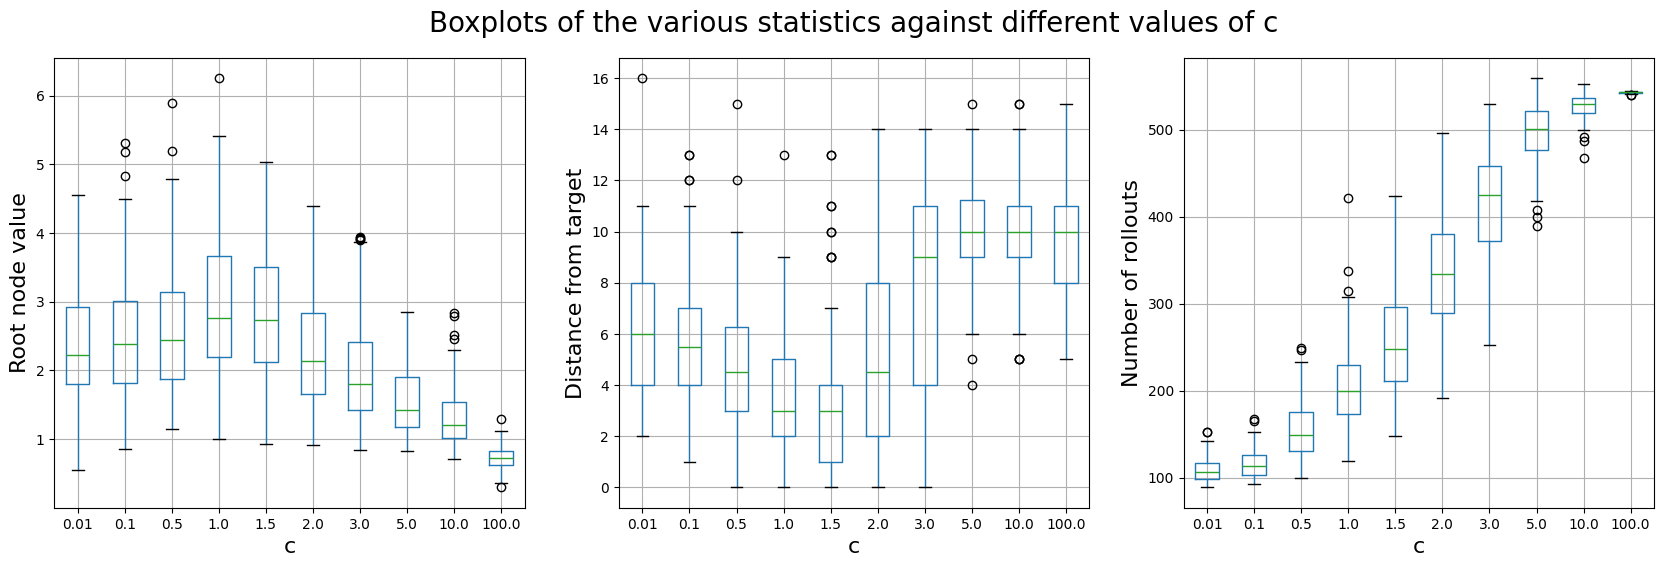

In [4]:
_, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(20, 6))
metadata['value'] = metadata.total / metadata.n
metadata.boxplot(column=['value'], by='c', ax=ax1)
ax1.set_title("")
ax1.set_xlabel("c", fontsize=16)
ax1.set_ylabel("Root node value", fontsize=16)
# ax1.grid(False)
metadata.boxplot(column=['distance'], by='c', ax=ax2)
ax2.set_title("")
ax2.set_xlabel("c", fontsize=16)
ax2.set_ylabel("Distance from target", fontsize=16)
metadata.boxplot(column=['n'], by='c', ax=ax3)
ax3.set_title("")
ax3.set_xlabel("c", fontsize=16)
ax3.set_ylabel("Number of rollouts", fontsize=16)
plt.suptitle("Boxplots of the various statistics against different values of c", fontsize=20)
plt.savefig("figures/boxplots.png")
plt.show()

In [5]:
from scipy.stats import ttest_ind

In [6]:
metadata.groupby('c').value.std()

c
0.01      0.812174
0.10      0.907466
0.50      0.923606
1.00      0.965129
1.50      0.927542
2.00      0.860753
3.00      0.765843
5.00      0.482729
10.00     0.438603
100.00    0.164447
Name: value, dtype: float64

In [7]:
ttest_ind(metadata.loc[1].value, metadata.loc[0.5].value, alternative='greater')

Ttest_indResult(statistic=2.399729320145447, pvalue=0.008666868926274905)

In [8]:
ttest_ind(metadata.loc[1.5].value, metadata.loc[2].value, alternative='greater')

Ttest_indResult(statistic=3.9607191689923935, pvalue=5.2100811853008166e-05)

In [9]:
ttest_ind(metadata.loc[1].value, metadata.loc[1.5].value)

Ttest_indResult(statistic=0.7543805462424087, pvalue=0.4515170122984892)

In [10]:
metadata.groupby('c').distance.std()

c
0.01      2.543441
0.10      2.576722
0.50      2.516933
1.00      2.308942
1.50      2.877218
2.00      3.703670
3.00      3.933423
5.00      2.185605
10.00     2.092217
100.00    2.128475
Name: distance, dtype: float64

In [11]:
ttest_ind(metadata.loc[1].distance, metadata.loc[0.5].distance, alternative='less')

Ttest_indResult(statistic=-4.069591391542477, pvalue=3.400468204256664e-05)

In [12]:
ttest_ind(metadata.loc[1.5].distance, metadata.loc[2].distance, alternative='less', equal_var=False)

Ttest_indResult(statistic=-3.8806450418189584, pvalue=7.219328666307454e-05)

In [13]:
ttest_ind(metadata.loc[1].distance, metadata.loc[1.5].distance)

Ttest_indResult(statistic=0.02710674585340626, pvalue=0.9784018951387488)